In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# reading the web Traffic data
data = sp.genfromtxt("data/web_traffic.tsv", delimiter="\t")
data

array([[  1.00000000e+00,   2.27200000e+03],
       [  2.00000000e+00,              nan],
       [  3.00000000e+00,   1.38600000e+03],
       ..., 
       [  7.41000000e+02,   5.39200000e+03],
       [  7.42000000e+02,   5.90600000e+03],
       [  7.43000000e+02,   4.88100000e+03]])

In [3]:
# splitting the data into X and y
print(data.dtype)

X = data[:,0]
y = data[:,1]

print("total X :", len(X))
print("total X :", len(y))

float64
total X : 743
total X : 743


In [4]:
# checking if any value in y is NA or nan which is not required for us to calculation
print(np.sum(X==np.nan))  ## this calc is wrong as we can not compare the NA or nan with any value
print(np.sum(np.isnan(X)))

print(np.sum(y==np.nan))  ## 
print(np.sum(np.isnan(y)))

0
0
0
8


In [5]:
# so y is having 8 NaN or NA in the data so filtering the
X = X[~np.isnan(y)]
y = y[~np.isnan(y)]

print(len(X), len(y))

735 735


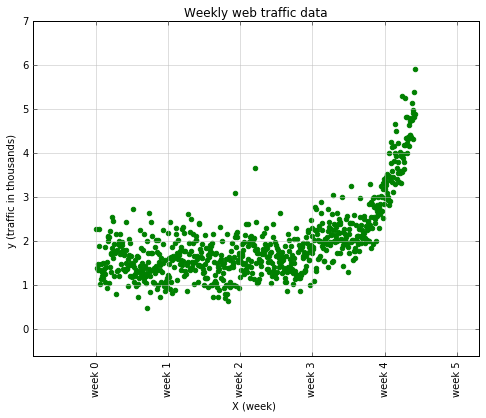

In [6]:
## Plotting the data 

#  setting the plot
plt.figure(figsize=(8,6), dpi=80)

# plot type and color
plt.scatter(X,y, color='green')

# plot labels
plt.xlabel("X (week) ")
plt.ylabel("y (traffic in thousands) ")
plt.title("Weekly web traffic data")

# grid and autoscale
plt.grid(True, linestyle='-', color='0.75')
plt.autoscale(True)

# ticks renaming
# plt.xticks(x, labels, rotation='vertical')
v1 = [w*7*24 for w in range(10)]
lbl = ["week %i" % i for i in range(10) ]
plt.xticks(v1, lbl, rotation='vertical')
plt.yticks([i*1000 for i in range(10)], ["%i" % i for i in range(10)])

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# display plot
plt.show()

In [7]:
# Chossing the model

# creating the rss error func
def rssErr(f, x, y):
    return(np.sum((y-f(x))**2))   

** Fitting a linear model fp1 **

In [8]:
# starting with linear model where degree is 1
# polyfit() - best put that line into the chart so that it results in the smallest
# approximation error

fp1, residuals, rank, sv, rcond = sp.polyfit(X, y, 1, full=True)
fp1

array([   2.59619213,  989.02487106])

    Linear Function :
    f(x) = 2.59619213 + 989.02487106 * x

In [9]:
print(residuals)
print(rank, sv, rcond)

[  3.17389767e+08]
2 [ 1.36699071  0.36240365] 1.6320278462e-13


In [10]:
# fitting these value in a linear model
f1 = sp.poly1d(fp1)
f1

poly1d([   2.59619213,  989.02487106])

In [11]:
# checking put the error for fp1 model
rssErr(f1, X, y)

317389767.33977801

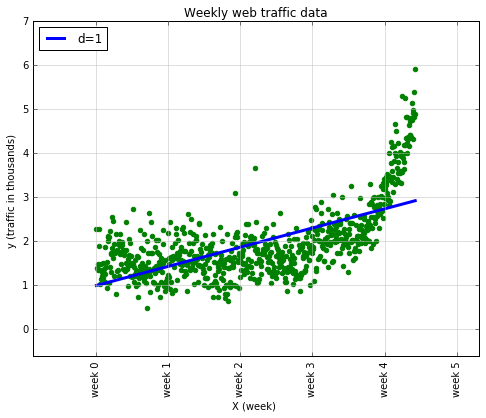

In [12]:
# plotting it
#  setting the plot
plt.figure(figsize=(8,6), dpi=80)

# plot type and color
plt.scatter(X,y, color='green')
plt.plot(X, f1(X), color='blue', linewidth=3)   #plotting the fucntions

# adding legends
plt.legend(["d=%i" % f1.order], loc="upper left")

# plot labels
plt.xlabel("X (week) ")
plt.ylabel("y (traffic in thousands) ")
plt.title("Weekly web traffic data")

# grid and autoscale
plt.grid(True, linestyle='-', color='0.75')
plt.autoscale(True)

# ticks renaming
# plt.xticks(x, labels, rotation='vertical')
v1 = [w*7*24 for w in range(10)]
lbl = ["week %i" % i for i in range(10) ]
plt.xticks(v1, lbl, rotation='vertical')
plt.yticks([i*1000 for i in range(10)], ["%i" % i for i in range(10)])

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# display plot
plt.show()

** Fitting the model with polynomial degree of 2 **

In [13]:
fp2 = sp.polyfit(X, y, 2)
fp2

array([  1.05322215e-02,  -5.26545650e+00,   1.97476082e+03])

In [14]:
# fitting the model
f2 = sp.poly1d(fp2)
f2

poly1d([  1.05322215e-02,  -5.26545650e+00,   1.97476082e+03])

In [15]:
# checking put the error for fp1 model
rssErr(f2, X, y)

179983507.87817919

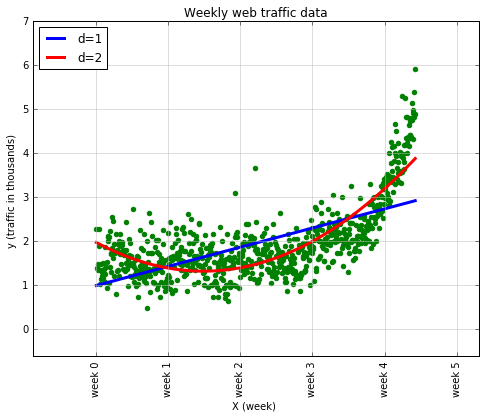

In [37]:
# plotting it
#  setting the plot
plt.figure(figsize=(8,6), dpi=80)

# plot type and color
plt.scatter(X,y, color='green')
l1, = plt.plot(X, f1(X), color='blue', linewidth=3)   #plotting the fucntions
l2, = plt.plot(X, f2(X), color='red', linewidth=3)   #plotting the fucntions

# adding legends
plt.legend([l1, l2], ["d=%i" % f1.order, "d=%i" % f2.order], loc="upper left")
#plt.legend(["d=%i" % f1.order], loc="upper left")
#plt.legend(["d=%i" % f2.order], loc="upper left")

# plot labels
plt.xlabel("X (week) ")
plt.ylabel("y (traffic in thousands) ")
plt.title("Weekly web traffic data")

# grid and autoscale
plt.grid(True, linestyle='-', color='0.75')
plt.autoscale(True)

# ticks renaming
# plt.xticks(x, labels, rotation='vertical')
v1 = [w*7*24 for w in range(10)]
lbl = ["week %i" % i for i in range(10) ]
plt.xticks(v1, lbl, rotation='vertical')
plt.yticks([i*1000 for i in range(10)], ["%i" % i for i in range(10)])

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# display plot
plt.show()

#### Trying to fir the model with 53 polynomial

In [20]:
fp53 = sp.polyfit(X, y, 53)
fp53

C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


array([ -6.72757712e-140,   1.19710645e-136,  -4.66409475e-135,
        -4.66529661e-131,  -2.54198136e-128,   2.26156478e-126,
         1.39014762e-122,   1.16093890e-119,   4.32182384e-117,
        -1.50838091e-114,  -3.76625193e-111,  -3.20489362e-108,
        -1.48599404e-105,   6.30299226e-104,   8.53578286e-100,
         9.10930904e-097,   5.56783977e-094,   1.31815161e-091,
        -1.52871800e-088,  -2.41369625e-085,  -1.84967143e-082,
        -7.30316898e-080,   2.08030615e-077,   6.26218660e-074,
         5.61037248e-071,   2.52820927e-068,  -4.41898626e-066,
        -1.85478081e-062,  -1.62962217e-059,  -5.76873382e-057,
         3.55020117e-054,   6.50872665e-051,   3.79794068e-048,
        -4.37595886e-046,  -2.48093022e-042,  -1.57847617e-039,
         3.46199499e-037,   1.09207054e-033,   3.34298349e-031,
        -4.93730909e-028,  -2.97732759e-025,   2.64726514e-022,
         1.18878653e-019,  -2.02259085e-016,   1.03624647e-013,
        -2.90540411e-011,   4.79731673e-

In [21]:
# fitting the model
f53 = sp.poly1d(fp53)
f53

poly1d([ -6.72757712e-140,   1.19710645e-136,  -4.66409475e-135,
        -4.66529661e-131,  -2.54198136e-128,   2.26156478e-126,
         1.39014762e-122,   1.16093890e-119,   4.32182384e-117,
        -1.50838091e-114,  -3.76625193e-111,  -3.20489362e-108,
        -1.48599404e-105,   6.30299226e-104,   8.53578286e-100,
         9.10930904e-097,   5.56783977e-094,   1.31815161e-091,
        -1.52871800e-088,  -2.41369625e-085,  -1.84967143e-082,
        -7.30316898e-080,   2.08030615e-077,   6.26218660e-074,
         5.61037248e-071,   2.52820927e-068,  -4.41898626e-066,
        -1.85478081e-062,  -1.62962217e-059,  -5.76873382e-057,
         3.55020117e-054,   6.50872665e-051,   3.79794068e-048,
        -4.37595886e-046,  -2.48093022e-042,  -1.57847617e-039,
         3.46199499e-037,   1.09207054e-033,   3.34298349e-031,
        -4.93730909e-028,  -2.97732759e-025,   2.64726514e-022,
         1.18878653e-019,  -2.02259085e-016,   1.03624647e-013,
        -2.90540411e-011,   4.79731673e

In [23]:
# checking put the error for fp1 model
rssErr(f53, X, y)

109452401.96765307

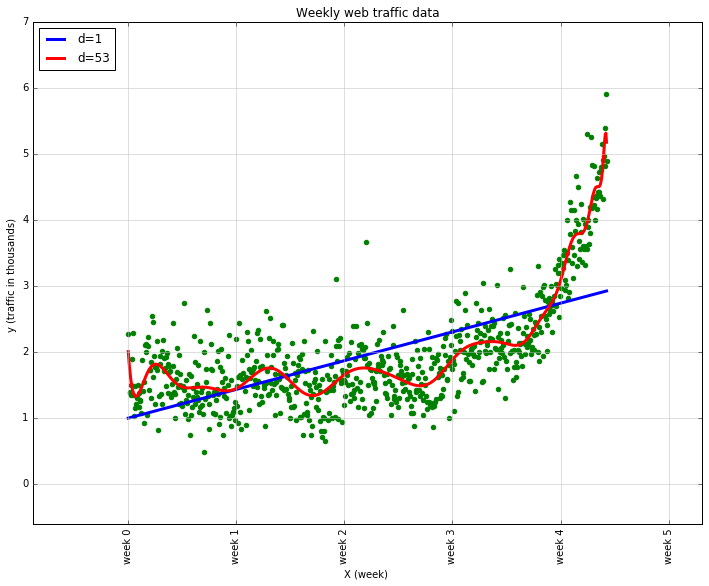

In [40]:
# plotting it
#  setting the plot
plt.figure(figsize=(12,9), dpi=80)

# plot type and color
plt.scatter(X,y, color='green')
l1, = plt.plot(X, f1(X), color='blue', linewidth=3)   #plotting the fucntions
l53, = plt.plot(X, f53(X), color='red', linewidth=3)   #plotting the fucntions

# adding legends
plt.legend([l1, l53],["d=%i" % f1.order, "d=%i" % f53.order], loc="upper left")


# plot labels
plt.xlabel("X (week) ")
plt.ylabel("y (traffic in thousands) ")
plt.title("Weekly web traffic data")

# grid and autoscale
plt.grid(True, linestyle='-', color='0.75')
plt.autoscale(True)

# ticks renaming
# plt.xticks(x, labels, rotation='vertical')
v1 = [w*7*24 for w in range(10)]
lbl = ["week %i" % i for i in range(10) ]
plt.xticks(v1, lbl, rotation='vertical')
plt.yticks([i*1000 for i in range(10)], ["%i" % i for i in range(10)])

# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)

# display plot
plt.show()

    As we can see that between week3 and week4, there is drastic change in data behaviour, so instead of plotting one line for all the data, we are going to split the data into two parts based on data behaviour

In [47]:
# taking n=3.5
split=int(3.5*7*24)
X1 = X[:split]
X2 = X[split:]
y1 = y[:split]
y2 = y[split:]

** Plotting the linear model with these 2 datasets **

In [48]:
fps1 = sp.polyfit(X1, y1, 1)
fs1 = sp.poly1d(fps1)

fps2 = sp.polyfit(X2, y2, 1)
fs2 = sp.poly1d(fps2)

In [49]:
# error in both
print(rssErr(fs1, X1, y1))
print(rssErr(fs2, X2, y2))

110806407.09
22143941.1076


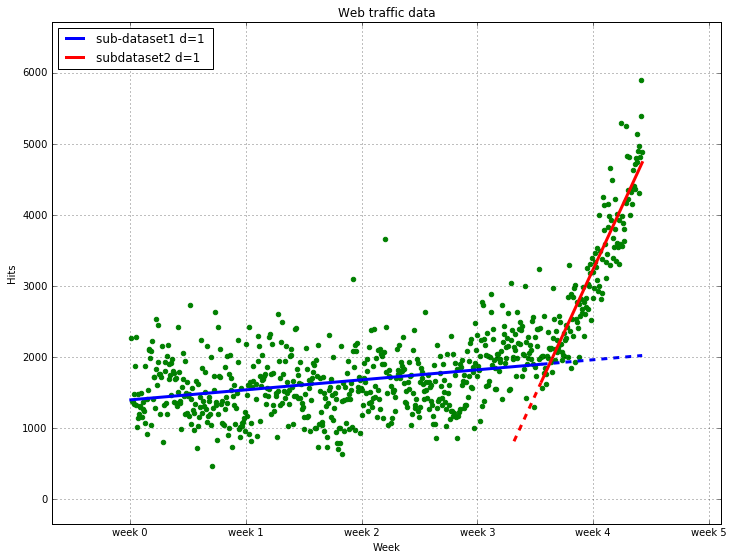

In [90]:
# plotting the data into 
plt.figure(figsize=(12,9), dpi=120)

# grid style and autoscale properties
plt.grid(True)
plt.autoscale(True)
plt.margins(0.15)

# assigning labels
plt.title("Web traffic data")
plt.xlabel("Week")
plt.ylabel("Hits")

# re-marking ticks
plt.xticks([w*7*24 for w in range(0, 9)], ["week %d" %i for i in range(0, 9)])

# plotting the data
plt.scatter(X, y, color='green')
ls1, = plt.plot(X1, fs1(X1), color='blue', linewidth=3)
plt.plot(X2, fs1(X2), color='blue', linewidth=3, linestyle='--')
ls2, = plt.plot(X2, fs2(X2), color='red', linewidth=3)
plt.plot(X1[split-40:split], fs2(X1[split-40:split]), color='red', linewidth=3, linestyle='--')

# adding legeds
plt.legend([ls1, ls2], ["sub-dataset1 d=%d " %fs1.order, "subdataset2 d=%d" %fs2.order], loc="upper left")

# display plot
plt.show()